In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Part 1

In [129]:
freq = [10,50,100,500,1000,5000,10000]
v0 = [4.00,4.00,3.96,3.88,3.84,3.84,3.84]
vc = [3.96,3.80,3.28,1.16,0.64,0.124,0.062]
phi_measured = [-900,-920,-880,-416,-236,-49.6,-24.8]
phi = [-86.40473,-72.55941,-57.85809,-17.65679,-9.04306,-1.82317,-0.91181]
freq = np.array(freq)
v0 = np.array(v0)
vc = np.array(vc)
phi_measured = np.array(phi_measured) / 1000000
phi = np.array(phi)

phi_measured = (360*freq*phi_measured+90)*-1    # convert to degrees
phi_measured

array([-86.76, -73.44, -58.32, -15.12,  -5.04,  -0.72,  -0.72])

Text(0.5, 1.0, 'Vc/V0 vs Frequency (log-log scale)')

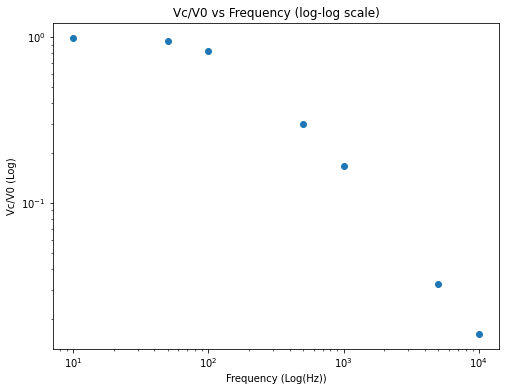

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(freq, vc/v0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Log(Hz))")
plt.ylabel("Vc/V0 (Log)")
plt.title("Vc/V0 vs Frequency (log-log scale)")

In [121]:
def func_to_fit(freq, A, tau):
    return A / np.sqrt(1+(freq)**2 * tau**2)

In [122]:
params, cov = curve_fit(func_to_fit, freq, vc/v0)
std_errs = np.sqrt(np.diag(cov))
print("params" + str(params))
print("std_errs" + str(std_errs))

params[ 0.99083243 -0.00631766]
std_errs[0.00536228 0.00013907]


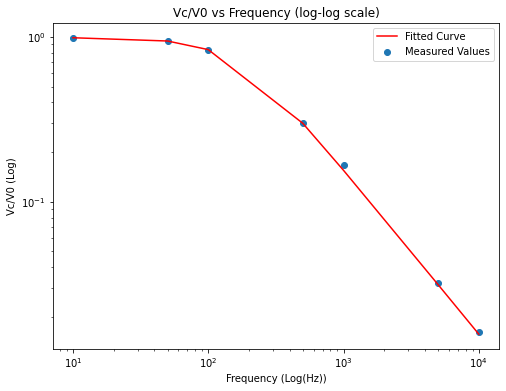

A = 0.9908324345100524 +/- 0.0053622847953118495
tau = -0.006317656268207664 +/- 0.00013906725563730358


In [180]:
ypred = func_to_fit(freq, *params)

plt.figure(figsize=(8,6))
plt.scatter(freq, vc/v0, label="Measured Values")
plt.plot(freq, ypred, 'r-', label="Fitted Curve")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Log(Hz))")
plt.ylabel("Vc/V0 (Log)")
plt.title("Vc/V0 vs Frequency (log-log scale)")
plt.show()
print("A = " + str(params[0]) + " +/- " + str(std_errs[0]))
print("tau = " + str(params[1]) + " +/- " + str(std_errs[1]))

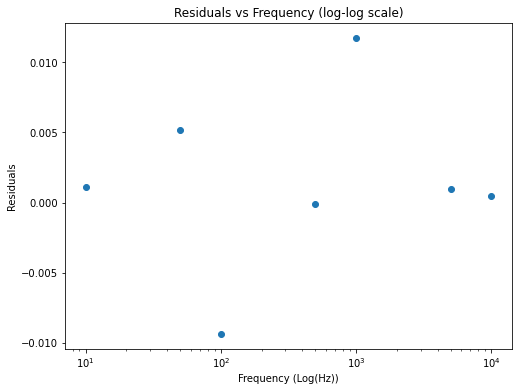

In [184]:
# residuals
residuals = vc/v0 - ypred
plt.figure(figsize=(8,6))
plt.scatter(freq, residuals)
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Frequency (Log(Hz))")
plt.ylabel("Residuals")
plt.title("Residuals vs Frequency (semi-log scale)")
plt.show()

In [160]:
def func_to_fit2(freq, tau, c):
    return np.arctan(-1*freq*tau) * 180 / np.pi + c

start_params = [-0.001, 90]

params2, cov2 = curve_fit(func_to_fit2, freq, phi_measured, p0=start_params)
std_errs2 = np.sqrt(np.diag(cov2))
print("params" + str(params2))
print("std_errs" + str(std_errs2))

ypred2 = func_to_fit2(freq, *params2)

params[-6.15391707e-03 -8.89037223e+01]
std_errs[5.30712136e-04 1.17343668e+00]


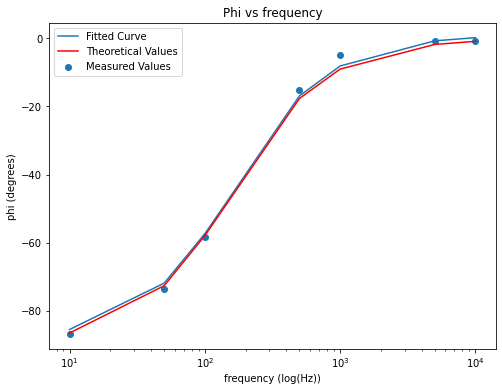

tau = -0.006153917070537044 +/- 0.0005307121358138024


In [162]:
plt.figure(figsize=(8,6))

plt.plot(freq, ypred2, label="Fitted Curve")
plt.scatter(freq, phi_measured, label="Measured Values")
plt.plot(freq, phi, 'r-', label="Theoretical Values")
plt.legend()
plt.xscale("log")
plt.title("Phi vs frequency")
plt.xlabel("frequency (log(Hz))")
plt.ylabel("phi (degrees)")
plt.show()
print("tau = " + str(params2[0]) + " +/- " + str(std_errs2[0]))

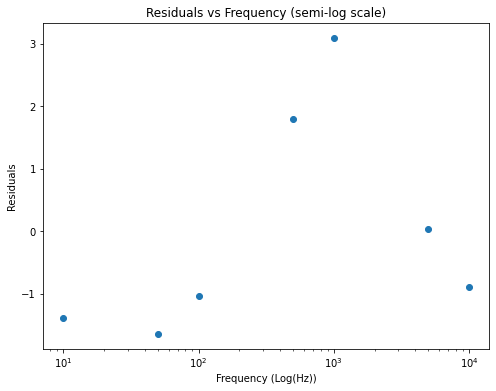

In [185]:
# residuals
residuals2 = phi_measured - ypred2
plt.figure(figsize=(8,6))
plt.scatter(freq, residuals2)
plt.xscale("log")
plt.xlabel("Frequency (Log(Hz))")
plt.ylabel("Residuals")
plt.title("Residuals vs Frequency (semi-log scale)")
plt.show()

In [164]:
tau_theoretical = 0.006283183060538469

In [174]:
# agreement test 1
lhs1 = np.abs(-1*params[1] - tau_theoretical)
print("LHS = " + str(lhs1))
rhs = 2 * np.sqrt(std_errs[1]**2)
print("RHS = " + str(rhs))
print("LHS < RHS: " + str(np.abs(-1*params[1] - tau_theoretical) < 2 * np.sqrt(std_errs[1]**2)))

LHS = 3.447320766919535e-05
RHS = 0.00027813451127460715
LHS < RHS: True


In [176]:
# agreement test 2
lhs1 = np.abs(-1*params2[0] - tau_theoretical)
print("LHS = " + str(lhs1))
rhs = 2 * np.sqrt(std_errs2[0]**2)
print("RHS = " + str(rhs))
print("LHS < RHS: " + str(np.abs(-1*params2[0] - tau_theoretical) < 2 * np.sqrt(std_errs2[0]**2)))

LHS = 0.00012926599000142452
RHS = 0.0010614242716276048
LHS < RHS: True
